
> 20101073- Md. Farhad

> 20101079- Abdullah Al Masud

> 20101083 -B M Shanjid Rashid Pranto

> 20101084- Asma sultana


<table><tr><font color= blodwhite   size=5 face="微软雅黑">
 Implement the multivariable linear regression *without SK-Learn*


dataset- https://www.kaggle.com/datasets/aemyjutt/diabetesdataanslysis  




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
#get dataset
data= pd.read_csv("/content/drive/MyDrive/Uap/4-1/work 4/implement/train_data.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
194,8,85,55,20,0,24.4,0.136,42,0
195,5,158,84,41,210,39.4,0.395,29,1
196,1,105,58,0,0,24.3,0.187,21,0
197,3,107,62,13,48,22.9,0.678,23,1


In [ ]:
#dataset length
n =len(data)
print(n)

199


In [ ]:
#showing column details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               199 non-null    int64  
 1   Glucose                   199 non-null    int64  
 2   BloodPressure             199 non-null    int64  
 3   SkinThickness             199 non-null    int64  
 4   Insulin                   199 non-null    int64  
 5   BMI                       199 non-null    float64
 6   DiabetesPedigreeFunction  199 non-null    float64
 7   Age                       199 non-null    int64  
 8   Outcome                   199 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 14.1 KB


<table><tr><font color= blodwhite   size=5 face="微软雅黑">
# Step 1 : Select the features

In [ ]:
# declear features,x.. & label,y
# independent feature
x1= data["Pregnancies"]
x2= data["Glucose"]
x3= data["BloodPressure"]
x4= data["SkinThickness"]
x5= data["Insulin"]
x6= data["BMI"]
x7= data["DiabetesPedigreeFunction"]
x8= data["Age"]

y= data["Outcome"] # dependent feature

print(x1.head())
print(x2.head())
print(x3.head())
print(x4.tail())
print(x5.tail())
print(x6.head())
print(x7.tail())
print(x8.head())
print(y.head())
x= len(x1)
x

0    6
1    1
2    8
3    1
4    0
Name: Pregnancies, dtype: int64
0    148
1     85
2    183
3     89
4    137
Name: Glucose, dtype: int64
0    72
1    66
2    64
3    66
4    40
Name: BloodPressure, dtype: int64
194    20
195    41
196     0
197    13
198    44
Name: SkinThickness, dtype: int64
194      0
195    210
196      0
197     48
198     99
Name: Insulin, dtype: int64
0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64
194    0.136
195    0.395
196    0.187
197    0.678
198    0.905
Name: DiabetesPedigreeFunction, dtype: float64
0    50
1    31
2    32
3    21
4    33
Name: Age, dtype: int64
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


199

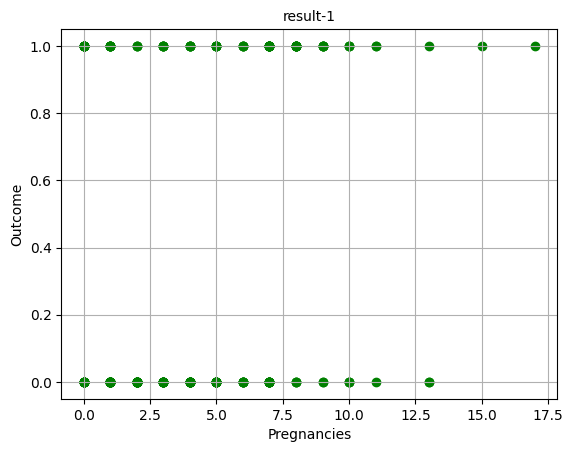

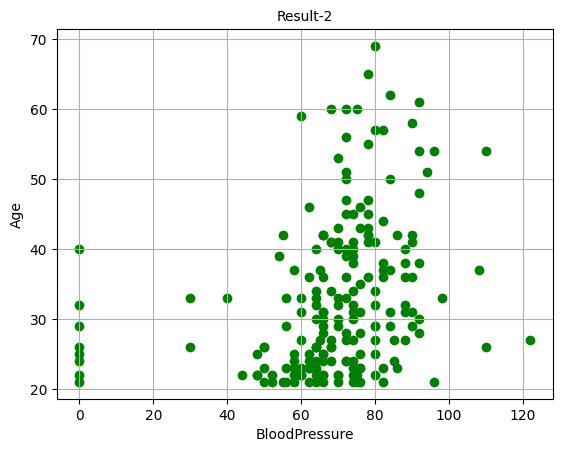

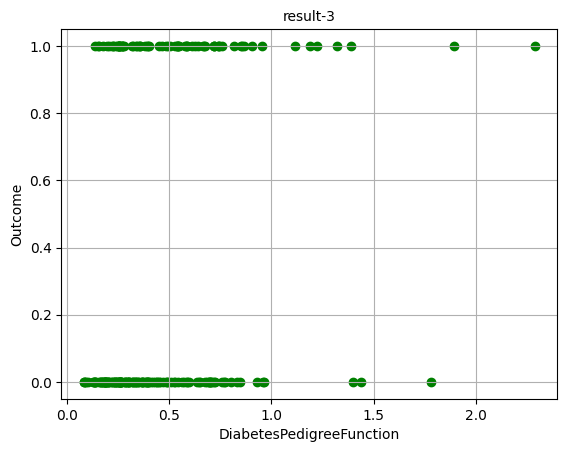

In [ ]:
#graph
import matplotlib.pyplot as plt

plt.scatter(data['Pregnancies'], data['Outcome'], color='green')
plt.title('result-1', fontsize=10)
plt.xlabel('Pregnancies', fontsize=10)
plt.ylabel('Outcome', fontsize=10)
plt.grid(True)
plt.show()

plt.scatter(data['BloodPressure'], data['Age'], color='green')
plt.title('Result-2', fontsize=10)
plt.xlabel('BloodPressure', fontsize=10)
plt.ylabel('Age', fontsize=10)
plt.grid(True)
plt.show()

plt.scatter(data['DiabetesPedigreeFunction'], data['Outcome'], color='green')
plt.title('result-3', fontsize=10)
plt.xlabel('DiabetesPedigreeFunction', fontsize=10)
plt.ylabel('Outcome', fontsize=10)
plt.grid(True)
plt.show()

<table><tr><font color= blodwhite   size=5 face="微软雅黑">
#Step 2 : Normalize the feature
without sk-learn

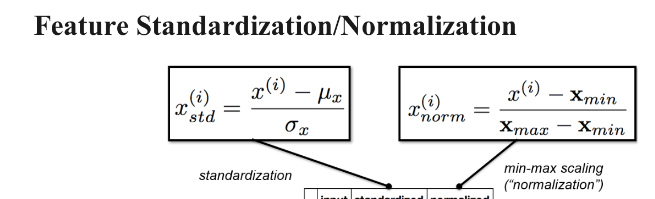



In [ ]:
data = np.array([x1, x2, x3,x4, x5, x6, x7, x8])  # Replace x1, x2.... with data

mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)

normalized_data = (data - mean) / std_dev
min_val = np.min(normalized_data, axis=0)
max_val = np.max(normalized_data, axis=0)

scaled_data = (normalized_data - min_val) / (max_val - min_val)
# normalized data
scaled_data

array([[0.04054054, 0.01176471, 0.04371585, ..., 0.00952381, 0.02183932,
        0.02863222],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.48648649, 0.77647059, 0.34972678, ..., 0.55238095, 0.5767574 ,
        0.58369952],
       ...,
       [0.22702703, 0.31294118, 0.1273224 , ..., 0.23142857, 0.2090066 ,
        0.31356677],
       [0.00423649, 0.00412941, 0.00367213, ..., 0.00178095, 0.        ,
        0.        ],
       [0.33783784, 0.36470588, 0.17486339, ..., 0.2       , 0.20994714,
        0.2321569 ]])

In [ ]:
x1 = scaled_data[0]
x2 = scaled_data[1]
x3 = scaled_data[2]
x4 = scaled_data[3]
x5 = scaled_data[4]
x6 = scaled_data[5]
x7 = scaled_data[6]
x8 = scaled_data[7]
print(x1,"\n", x2,"\n", x3,"\n", x4,"\n", x5, "\n",x6, "\n",x7,"\n",x8)


[0.04054054 0.01176471 0.04371585 0.00887747 0.         0.04310345
 0.03136111 0.08695652 0.00339325 0.064      0.03636364 0.05952381
 0.07194245 0.00071192 0.02530201 0.07       0.         0.06542056
 0.00794616 0.00411458 0.00979957 0.08080808 0.03571429 0.07563025
 0.07373101 0.07848872 0.04761905 0.00367708 0.0881144  0.04273504
 0.04587156 0.008802   0.03115133 0.06521739 0.08196721 0.01588199
 0.07971014 0.08823529 0.02222222 0.01269394 0.01518397 0.05263158
 0.06603774 0.03459978 0.04402516 0.         0.00684932 0.02816901
 0.06796117 0.06666667 0.00496542 0.00471764 0.05313833 0.02514915
 0.01840707 0.01369863 0.02220935 0.         0.         0.
 0.02380952 0.06015038 0.08064516 0.00927292 0.06140351 0.05050505
 0.         0.01834862 0.00703526 0.02613657 0.01142909 0.03287508
 0.1031746  0.01397121 0.01265823 0.02083333 0.08974359 0.05263158
 0.         0.01785714 0.02654867 0.02702703 0.07579682 0.
 0.03649635 0.01047449 0.12264151 0.01681448 0.10929207 0.00934579
 0.0125    

In [ ]:
#Learning rate Alpha = min(x)/100
alpha=0.2
print(alpha)

0.2


<table><tr><font color= blodwhite   size=4 face="微软雅黑">
# Step 3 : Select loss function and formulate a hypothesis
<table><tr><font color= blodwhite   size=4 face="微软雅黑">
# Step 4 :  Minimize the cost and loss function



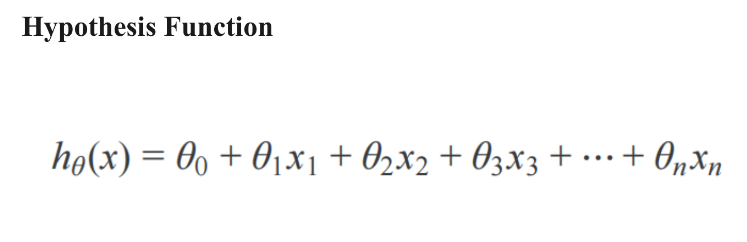



<table><tr><font color= blodwhite   size=3 face="微软雅黑">The cost function is defined as follows:<br>$$J:=\frac{1}{2m}\sum_{i=1}^m (h_{\theta}(x_i)-y_i)^2 $$ where m depends on the training set.
<br>Gradient descent is uesd to search the minimum and the definition is: <br>$$\theta:=\theta-\alpha\frac{\partial}{\partial \theta}J(\theta)$$
where $\alpha$ is a number called learning rate.

In [ ]:
J = 100
cnt = 0 # iteration
theta = [1,1.5,2, 3,3.5,5, 8,9]
cost =[]

for i in range(100):

  print("Iteration no-  ", cnt+1)
  cnt = cnt+1
  # Hypothesis Function
  h = []
  print("Hypothesis function, h(θ)- ")
  for i2 in range(n):
    temp = theta[0] + theta[1]*x1[i2] + theta[2]*x2[i2] + theta[3]*x3[i2] + theta[4]*x4[i2] + theta[5]*x5[i2] + theta[6]*x6[i2] + theta[7]*x7[i2]
    h.append(temp)
    #print(temp)

  # Cost Function
  error_sum = 0
  for i3 in range(n):
    error_sum = error_sum + (h[i3] - y[i3])**2

  J = (1/(2*n))* error_sum
  if J == float("inf") :
    theta = [random.randint(-100,100),random.randint(-100,100), random.randint(-100,100),random.randint(-100,100), random.randint(-100,100),random.randint(-100,100), random.randint(-100,100),random.randint(-100,100), random.randint(-100,100)]
    continue
  print("Cost function value, J(θ)-  ",J)
  cost.append(J)

    # Gradient Descent

  temp0 = 0
  for i4 in range(n):
    temp0 = temp0 + (h[i4] - y[i4])

  theta[0] = theta[0] - (alpha/n)*temp0

  temp1 = 0
  for i5 in range(n):
    temp1 = temp1 + (h[i5] - y[i5])*x1[i5]

  theta[1] = theta[1] - (alpha/n)*temp1

  temp1 = 0
  for i6 in range(n):
    temp1 = temp1 + (h[i5] - y[i5])*x2[i5]

  theta[2] = theta[2] - (alpha/n)*temp1

  temp1 = 0
  for i7 in range(n):
    temp1 = temp1 + (h[i5] - y[i5])*x3[i5]

  theta[3] = theta[3] - (alpha/n)*temp1

  temp1 = 0
  for i8 in range(n):
    temp1 = temp1 + (h[i5] - y[i5])*x4[i5]

  theta[4] = theta[4] - (alpha/n)*temp1

  print("gradient decent value- ",theta)
  print("\n")

print("result - ",theta)


Iteration no-   1
Hypothesis function, h(θ)- 
Cost function value, J(θ)-   42.50715779418142
gradient decent value-  [-0.7732669399297134, 1.4448371940137499, -0.44707895832370204, 1.571641177895059, 2.5244056828811776, 5, 8, 9]


Iteration no-   2
Hypothesis function, h(θ)- 
Cost function value, J(θ)-   10.586129491819657
gradient decent value-  [-1.5529488641434972, 1.4227718221087238, -1.8052369568746516, 0.7788850012118421, 1.982939204805844, 5, 8, 9]


Iteration no-   3
Hypothesis function, h(θ)- 
Cost function value, J(θ)-   3.9703134805015856
gradient decent value-  [-1.8221349263267754, 1.4177526823025615, -2.5999802783031, 0.3149937031358203, 1.6660932504420085, 5, 8, 9]


Iteration no-   4
Hypothesis function, h(θ)- 
Cost function value, J(θ)-   3.1752560279313697
gradient decent value-  [-1.8300597631456479, 1.4214979914687818, -3.1024905106624385, 0.0216787199200153, 1.465753933512218, 5, 8, 9]


Iteration no-   5
Hypothesis function, h(θ)- 
Cost function value, J(θ)-   3.4

<table><tr><font color= blodwhite   size=3 face="微软雅黑">
# graphs

Text(0.5, 1.0, 'Cost function using Gradient Descent')

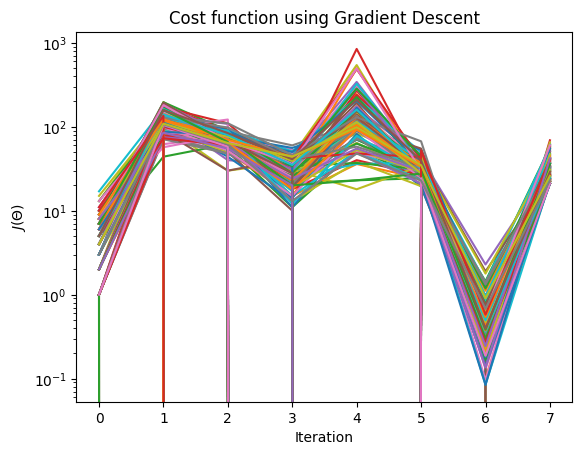

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.yscale("log")
plt.title("Cost function using Gradient Descent")

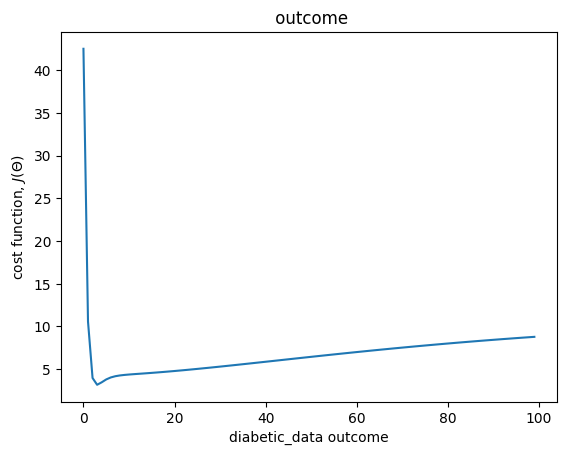

In [ ]:
import matplotlib.pyplot as plt

x= [i for i in range(0, 100)]
plt.title(" outcome")
plt.plot(x, cost)
plt.xlabel('diabetic_data outcome')
plt.ylabel('cost function, $J(\Theta)$')

plt.show()